<a href="https://colab.research.google.com/github/shivhub09/LSTM_STOCK_PRICE_PREDICTION/blob/main/STOCK_PRICE_PREDICTION_BHEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [1]:
!pip install yfinance

In [94]:
import yfinance as yf
from datetime import datetime

In [95]:
df = yf.download("BHEL.NS", )

[*********************100%%**********************]  1 of 1 completed


In [96]:
df.to_csv('BHEL.csv')

In [97]:
import pandas as pd

In [98]:
# end = datetime.now()
# start = datetime(end.year - 5, end.month - 1, end.day-3)

In [99]:
# df = yf.download("BHEL.NS" , start=start, end=end)
df = yf.download("BHEL.NS")

[*********************100%%**********************]  1 of 1 completed


In [100]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,5.733333,5.883333,5.733333,5.883333,4.559365,1501500
1996-01-02,5.883333,5.616666,5.616666,5.616666,4.352708,1500
1996-01-03,5.616666,5.700000,5.603333,5.700000,4.417286,4500
1996-01-04,5.700000,5.600000,5.600000,5.600000,4.339791,1500
1996-01-05,5.600000,5.700000,5.533333,5.700000,4.417286,1438500


In [101]:
df.shape

(7102, 6)

In [102]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-03,250.550003,254.649994,248.649994,251.800003,251.800003,19412822
2024-04-04,253.000000,256.899994,247.449997,251.500000,251.500000,15849252
2024-04-05,251.500000,255.899994,247.750000,254.949997,254.949997,14549888
2024-04-08,255.750000,258.299988,254.149994,256.450012,256.450012,12516140
2024-04-09,257.200012,259.899994,254.750000,255.699997,255.699997,10103349


In [103]:
df1=df.reset_index()['Close']

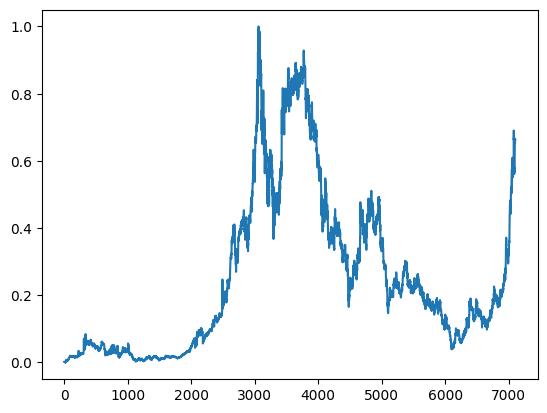

In [119]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [106]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [120]:
import numpy as np

In [121]:
df1

array([[0.00198644],
       [0.00128015],
       [0.00150087],
       ...,
       [0.66166084],
       [0.66563376],
       [0.66364728]])

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [123]:
df1

array([[0.00198644],
       [0.00128015],
       [0.00150087],
       ...,
       [0.66166084],
       [0.66563376],
       [0.66364728]])

In [124]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [125]:
training_size,test_size

(5326, 1776)

In [126]:
train_data

array([[0.00198644],
       [0.00128015],
       [0.00150087],
       ...,
       [0.2193029 ],
       [0.23289897],
       [0.23007381]])

In [127]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [169]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [170]:
print(X_train.shape), print(y_train.shape)

(5295, 30)
(5295,)


(None, None)

In [171]:
print(X_test.shape), print(ytest.shape)

(1745, 30)
(1745,)


(None, None)

In [172]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [176]:
X_train.shape , X_test.shape

((5295, 30, 1), (1745, 30, 1))

In [177]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Define the model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')


In [179]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 100)           40800     
                                                                 
 dropout_12 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_13 (LSTM)              (None, 30, 100)           80400     
                                                                 
 dropout_13 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [180]:
history = model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
83/83 [==============================] - 8s 22ms/step - loss: 0.0109 - val_loss: 6.0188e-04
Epoch 2/100
83/83 [==============================] - 1s 10ms/step - loss: 0.0016 - val_loss: 4.4592e-04
Epoch 3/100
83/83 [==============================] - 1s 11ms/step - loss: 0.0014 - val_loss: 3.2965e-04
Epoch 4/100
83/83 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 4.7601e-04
Epoch 5/100
83/83 [==============================] - 1s 10ms/step - loss: 0.0014 - val_loss: 3.6880e-04
Epoch 6/100
83/83 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 2.7305e-04
Epoch 7/100
83/83 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 3.9582e-04
Epoch 8/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0012 - val_loss: 3.4743e-04
Epoch 9/100
83/83 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 2.4963e-04
Epoch 10/100
83/83 [==============================] - 1s 10ms/st

In [181]:
import tensorflow as tf

In [182]:
tf.__version__

'2.15.0'

In [183]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

55/55 [==============================] - 0s 6ms/step


In [184]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [185]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.012585200153884746

In [186]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.008288887531725053

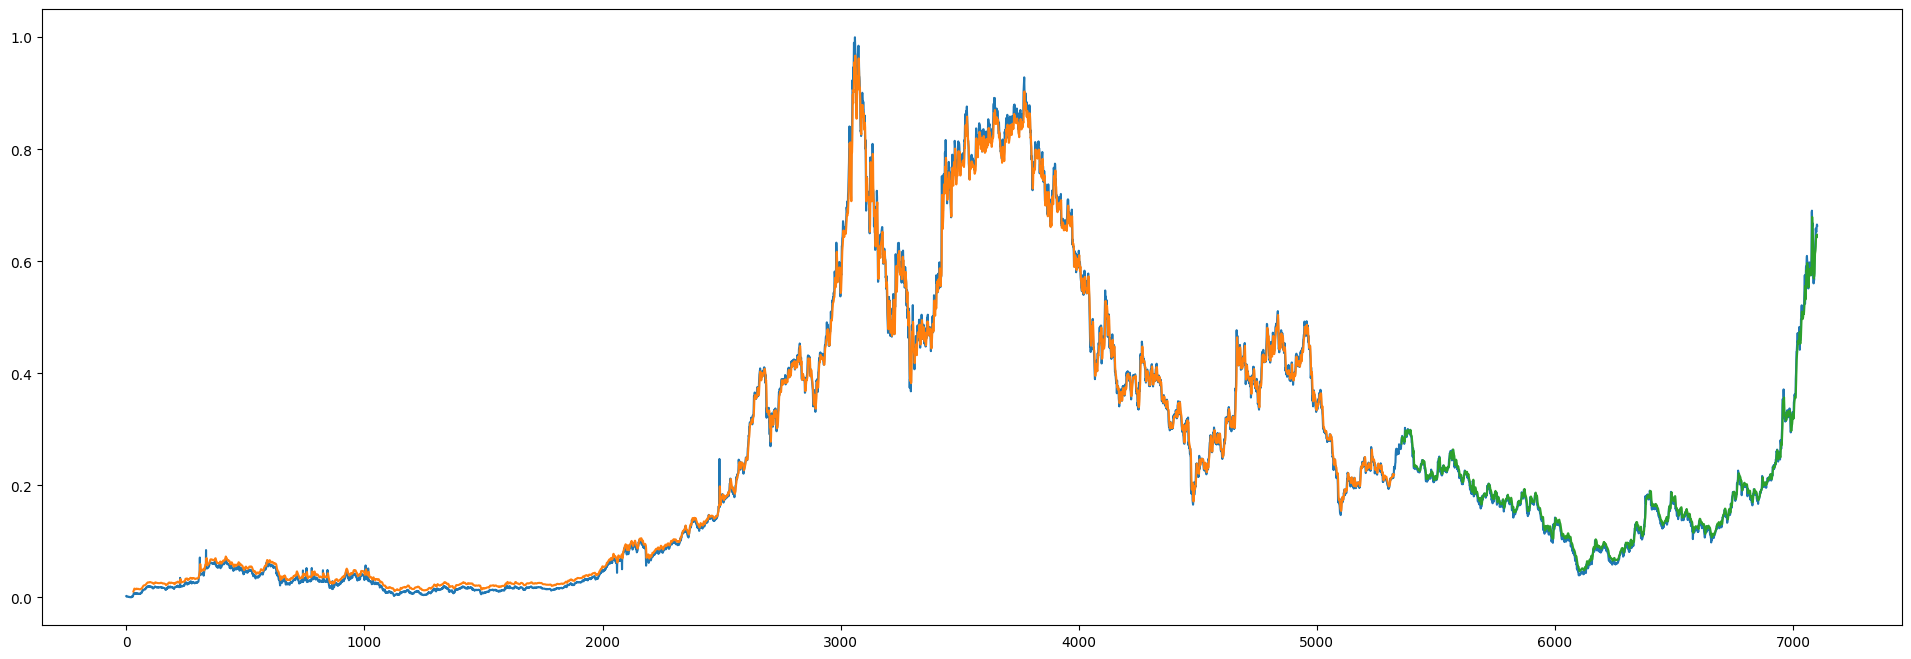

In [187]:
### Plotting
# shift train predictions for plotting
plt.figure(figsize=(24,8))
look_back=30
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [188]:
len(test_data)

1776

In [189]:
test_data.shape

(1776, 1)

In [190]:
x_input=test_data[1746:].reshape(1,-1)
x_input.shape

(1, 30)

In [191]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [192]:
len(temp_input)

30

In [193]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30):

    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


# print(lst_output)

[0.65638626]
31
1 day input [0.5904139  0.57597912 0.58154112 0.58908961 0.60961615 0.68708724
 0.69039797 0.66232299 0.66841474 0.66060142 0.63292371 0.58313029
 0.58617615 0.56048487 0.5804817  0.56591448 0.58167356 0.61464844
 0.61968078 0.62153478 0.63027512 0.64139918 0.65848254 0.65437723
 0.65331781 0.65252323 0.66166084 0.66563376 0.66364728 0.65638626]
1 day output [[0.65173197]]
2 day input [0.57597912 0.58154112 0.58908961 0.60961615 0.68708724 0.69039797
 0.66232299 0.66841474 0.66060142 0.63292371 0.58313029 0.58617615
 0.56048487 0.5804817  0.56591448 0.58167356 0.61464844 0.61968078
 0.62153478 0.63027512 0.64139918 0.65848254 0.65437723 0.65331781
 0.65252323 0.66166084 0.66563376 0.66364728 0.65638626 0.65173197]
2 day output [[0.6458366]]
3 day input [0.58154112 0.58908961 0.60961615 0.68708724 0.69039797 0.66232299
 0.66841474 0.66060142 0.63292371 0.58313029 0.58617615 0.56048487
 0.5804817  0.56591448 0.58167356 0.61464844 0.61968078 0.62153478
 0.63027512 0.641399

In [194]:
day_new=np.arange(1,31)
day_pred=np.arange(31,61)

In [195]:
import matplotlib.pyplot as plt

In [196]:
len(df1)

7102

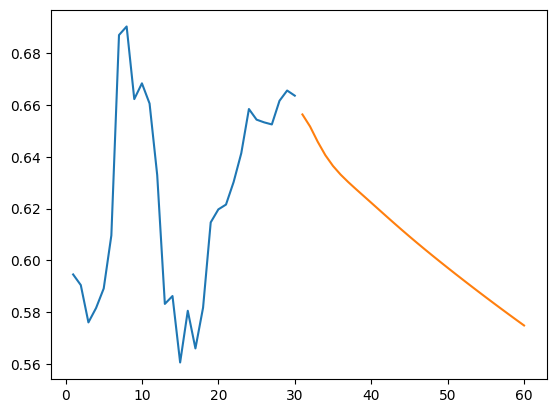

In [197]:
plt.plot(day_new,scaler.inverse_transform(df1[7072:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

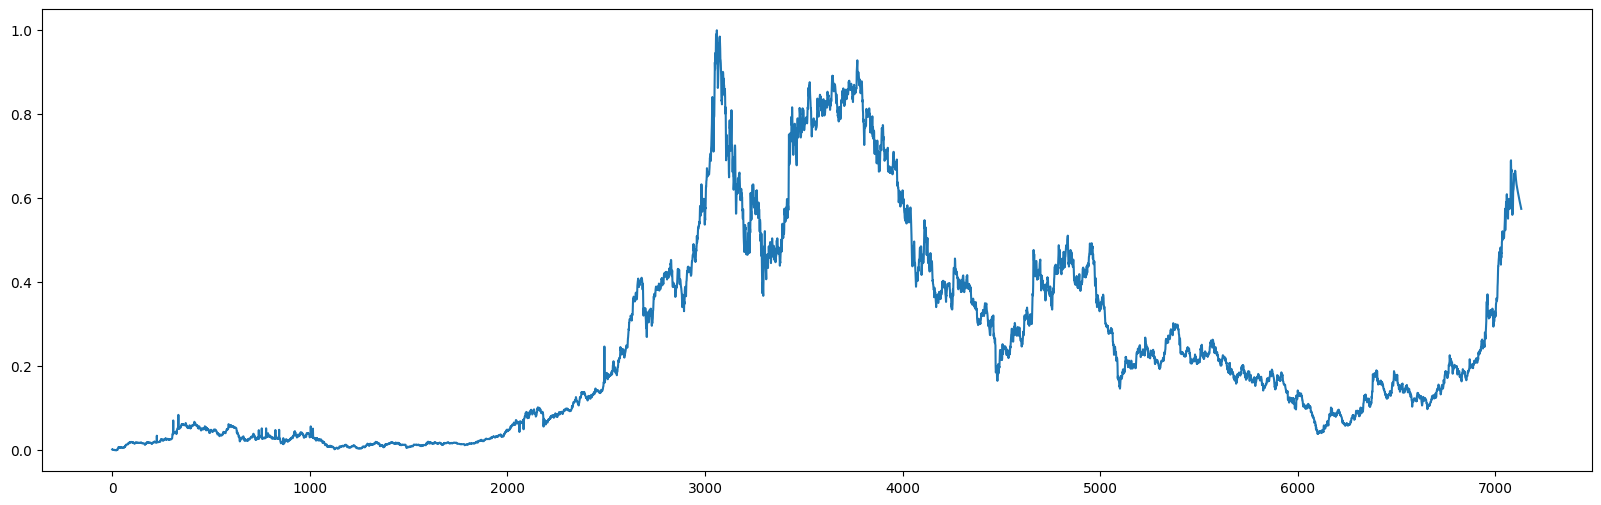

In [198]:
plt.figure(figsize=(20,6))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3)

In [199]:
df3=scaler.inverse_transform(df3).tolist()

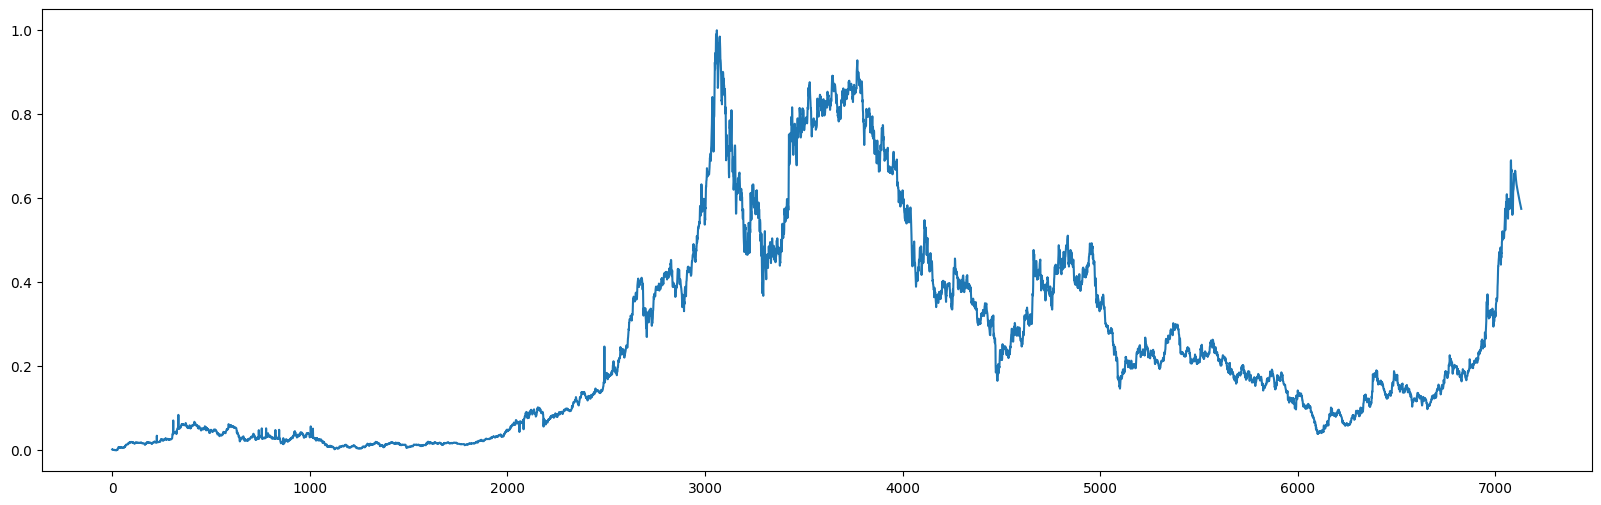

In [201]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
